<a href="https://colab.research.google.com/github/fatimaabuhamdeh/AI/blob/main/ANN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd

In [74]:
data = pd.read_csv('/content/Train.csv')
data = data.sample(frac=0.25,replace=False)
data['type']='benign'
data = pd.concat([data],axis=0,sort=False,ignore_index=True)

In [75]:
data.groupby('type')['type'].count()

type
benign    8477
Name: type, dtype: int64

In [76]:
sampler = np.random.permutation(len(data))
data = data.take(sampler)
data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels,type
4492,2.360357,0.386808,-0.697687,0.709977,-0.246560,1.156546,0.182198,5,1,3,0,0,0,1,2,1,1,benign
4362,-0.088167,-0.384031,-1.058161,-0.245270,-0.569351,3.163983,0.182198,10,0,1,0,1,0,0,8,0,0,benign
2756,0.006007,-0.041472,-0.577529,2.535043,0.076230,-0.411453,-0.251940,1,1,1,0,1,0,0,8,3,1,benign
7092,0.853573,0.689955,1.465155,-0.629698,-0.569351,-0.411453,-0.251940,4,1,2,0,0,1,0,10,3,1,benign
1632,0.571051,2.084166,0.624050,-0.392828,0.721811,-0.411453,-0.251940,4,1,2,0,1,0,0,9,3,0,benign


In [77]:
labels = pd.get_dummies(data['type'],prefix='type')
labels.head()

,type_benign
4492,1
4362,1
2756,1
7092,1
1632,1


In [78]:
data = data.drop(columns='type')
data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
4492,2.360357,0.386808,-0.697687,0.709977,-0.246560,1.156546,0.182198,5,1,3,0,0,0,1,2,1,1
4362,-0.088167,-0.384031,-1.058161,-0.245270,-0.569351,3.163983,0.182198,10,0,1,0,1,0,0,8,0,0
2756,0.006007,-0.041472,-0.577529,2.535043,0.076230,-0.411453,-0.251940,1,1,1,0,1,0,0,8,3,1
7092,0.853573,0.689955,1.465155,-0.629698,-0.569351,-0.411453,-0.251940,4,1,2,0,0,1,0,10,3,1
1632,0.571051,2.084166,0.624050,-0.392828,0.721811,-0.411453,-0.251940,4,1,2,0,1,0,0,9,3,0


In [79]:
def standardize(df,col):
  df[col] = (df[col]-df[col].mean())/df[col].std()
data_st = data.copy()
for i in (data_st.iloc[:,:-1].columns):
  standardize(data_st,i)
data_st.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
4492,2.350556,0.381429,-0.716547,0.705744,-0.257392,1.168047,0.242747,0.204655,-0.279402,2.378774,-0.139133,-1.125626,-0.436349,0.395517,-1.181149,-1.591885,1
4362,-0.083261,-0.381775,-1.075661,-0.240116,-0.574438,3.186508,0.242747,1.729406,-1.939169,-0.293308,-0.139133,0.888290,-0.436349,-0.721710,0.821238,-2.609102,0
2756,0.010347,-0.042609,-0.596843,2.512875,0.059654,-0.408562,-0.310565,-1.015146,-0.279402,-0.293308,-0.139133,0.888290,-0.436349,-0.721710,0.821238,0.442550,1
7092,0.852822,0.681573,1.438136,-0.620767,-0.574438,-0.408562,-0.310565,-0.100295,-0.279402,1.042733,-0.139133,-1.125626,2.291475,-0.721710,1.488700,0.442550,1
1632,0.571997,2.061976,0.600204,-0.386225,0.693747,-0.408562,-0.310565,-0.100295,-0.279402,1.042733,-0.139133,0.888290,-0.436349,-0.721710,1.154969,0.442550,0


In [80]:
train_data_st = data_st.values
train_data_st

array([[ 2.35055552,  0.38142943, -0.71654746, ..., -1.1811495 ,
        -1.59188452,  1.        ],
       [-0.0832614 , -0.38177533, -1.07566139, ...,  0.82123787,
        -2.60910184,  0.        ],
       [ 0.01034694, -0.04260934, -0.59684281, ...,  0.82123787,
         0.44255014,  1.        ],
       ...,
       [ 0.19756363, -0.43380463,  1.31843151, ...,  0.82123787,
         0.44255014,  0.        ],
       [-0.73851981, -0.05073892, -0.11802423, ...,  0.82123787,
        -2.60910184,  0.        ],
       [ 0.29117197, -0.44453567,  0.12138506, ...,  1.15496909,
        -2.60910184,  0.        ]])

In [81]:
labels = labels.values
labels

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=uint8)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

x_train_st,x_test_st,y_train_st,y_test_st = train_test_split(train_data_st,labels,test_size=0.25,random_state=42)

model=Sequential()
model.add(Dense(100,input_dim=train_data_st.shape[1],activation='relu'))
model.add(Dense(400,input_dim=train_data_st.shape[1],activation='relu'))
model.add(Dense(100,input_dim=train_data_st.shape[1],activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(labels.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
r = model.fit(x_train_st,y_train_st,validation_data=(x_test_st,y_test_st),callbacks=[monitor],verbose=2,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


199/199 - 2s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 2s/epoch - 9ms/step
Epoch 2/100
199/199 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 647ms/epoch - 3ms/step
Epoch 3/100
199/199 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 642ms/epoch - 3ms/step
Epoch 4/100
199/199 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 621ms/epoch - 3ms/step
Epoch 5/100
199/199 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 618ms/epoch - 3ms/step
Epoch 6/100
199/199 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 693ms/epoch - 3ms/step
Epoch 6: early stopping


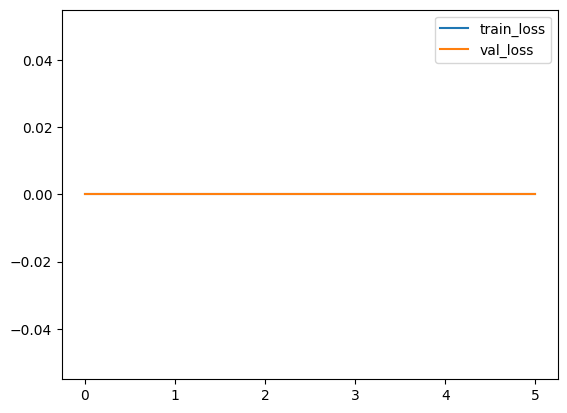

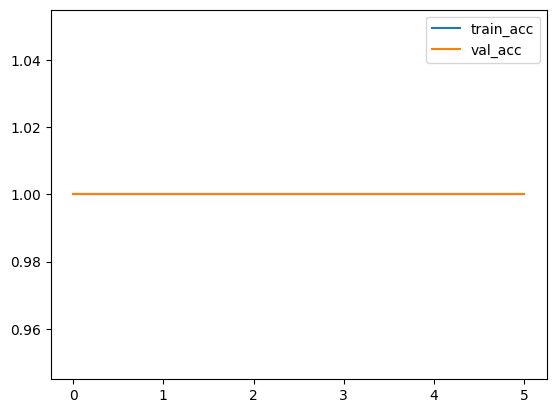

<Figure size 640x480 with 0 Axes>

In [86]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('lossVal_loss')

plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.savefig('accVal_acc')

In [88]:
pred_st = model.predict(x_test_st)
pred_st = np.argmax(pred_st,axis=1)
y_eval_st = np.argmax(y_test_st,axis=1)
score_st = metrics.accuracy_score(y_eval_st,pred_st)
print("accuracy: {}".format(score_st))

67/67 [==============================] - 1s 8ms/step
accuracy: 1.0
